# How to pass a threat?

In [1]:
import math

from shapely.geometry.point import Point
from shapely.geometry.polygon import Polygon
from algorithms.geometric import contact_points_given_circle_and_point, is_left_side_of_line, shift_point
from algorithms.planning import safest_path_single_threat, shortest_path_single_threat, single_threat_shortest_path_with_risk_constraint, single_threat_safest_path_with_length_constraint
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')
font = 12
title_font = 16
suptitle_font = 18

## check geometry utils

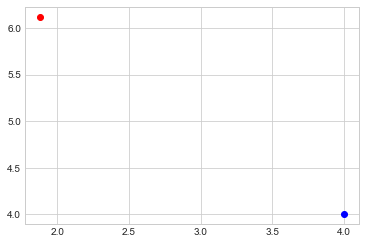

In [3]:
# shift

point = Point(4,4)
shifted_point = shift_point(point=point, distance=3, angle=3/4 * math.pi)
plt.scatter(point.x, point.y, color='blue')
plt.scatter(shifted_point.x, shifted_point.y, color='red')

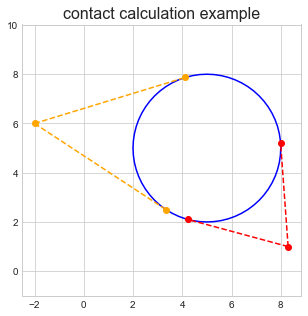

In [4]:
# check point of contact

center = Point(5,5)
radius = 3
point1 = Point(-2,6)
point2 = Point(8.3,1)

c11, c12 = contact_points_given_circle_and_point(center, radius, point1)
c21, c22 = contact_points_given_circle_and_point(center, radius, point2)

plt.figure(figsize=(5,5))
plt.title('contact calculation example', fontsize=title_font)
plt.grid(True)
plt.axis('equal')
plt.plot(*center.buffer(radius).exterior.xy, color='blue', zorder=1)

plt.scatter(point1.x, point1.y, color = 'orange', zorder=10)
plt.scatter(c11.x, c11.y, color='orange', zorder=10)
plt.scatter(c12.x, c12.y, color='orange', zorder=10)
plt.plot([point1.x, c11.x], [point1.y, c11.y], color='orange', linestyle='dashed', zorder=10)
plt.plot([point1.x, c12.x], [point1.y, c12.y], color='orange', linestyle='dashed', zorder=10)

plt.scatter(point2.x, point2.y, color = 'red', zorder=10)
plt.scatter(c21.x, c21.y, color='red', zorder=10)
plt.scatter(c22.x, c22.y, color='red', zorder=10)
plt.plot([point2.x, c21.x], [point2.y, c21.y], color='red', linestyle='dashed', zorder=10)
plt.plot([point2.x, c22.x], [point2.y, c22.y], color='red', linestyle='dashed', zorder=10)

# one threat

## shortest path with risk constraint

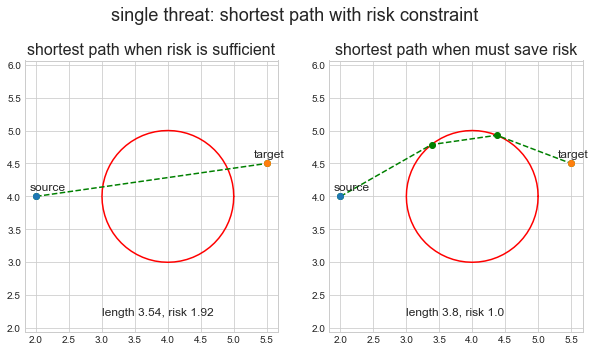

In [5]:
# shortest path single threat

source = Point(2,4)
target = Point(5.5,4.5)
threat_center = Point(4,4)
threat_radius = 1
threat = threat_center.buffer(threat_radius)

plt.figure(figsize=(10,5))
plt.grid(True)
plt.suptitle('single threat: shortest path with risk constraint', fontsize=suptitle_font, y=1.03)

plt.subplot(1,2,1)
plt.axis('equal')
plt.title('shortest path when risk is sufficient', fontsize=title_font)
plt.scatter(source.x, source.y, zorder=9)
plt.scatter(target.x, target.y, zorder=9)
plt.plot(*threat.exterior.xy, color='red', zorder=1)
plt.text(source.x - 0.1, source.y + 0.1, 'source', fontsize=font, zorder=10)
plt.text(target.x - 0.2, target.y + 0.1, 'target', fontsize=font, zorder=10)
path, length, risk = shortest_path_single_threat(source, target, threat_center, threat_radius)
plt.text(3.0, 2.2, f'length {round(length,2)}, risk {round(risk,2)}', fontsize=font, zorder=10)
plt.plot([p.x for p in path], [p.y for p in path], color='green', linestyle='dashed', zorder=5)
plt.scatter([p.x for p in path], [p.y for p in path], color='green', zorder=5)

plt.subplot(1,2,2)
plt.axis('equal')
plt.title('shortest path when must save risk', fontsize=title_font)
plt.scatter(source.x, source.y, zorder=9)
plt.scatter(target.x, target.y, zorder=9)
plt.plot(*threat.exterior.xy, color='red', zorder=1)
plt.text(source.x - 0.1, source.y + 0.1, 'source', fontsize=font, zorder=10)
plt.text(target.x - 0.2, target.y + 0.1, 'target', fontsize=font, zorder=10)
path, length, risk = single_threat_shortest_path_with_risk_constraint(source, target, threat_center, threat_radius, risk_limit=1)
plt.text(3.0, 2.2, f'length {round(length,2)}, risk {round(risk,2)}', fontsize=font, zorder=10)
plt.plot([p.x for p in path], [p.y for p in path], color='green', linestyle='dashed', zorder=5)
plt.scatter([p.x for p in path], [p.y for p in path], color='green', zorder=5)

plt.savefig('shortest_one_threat.png')

## safest path with length constraint

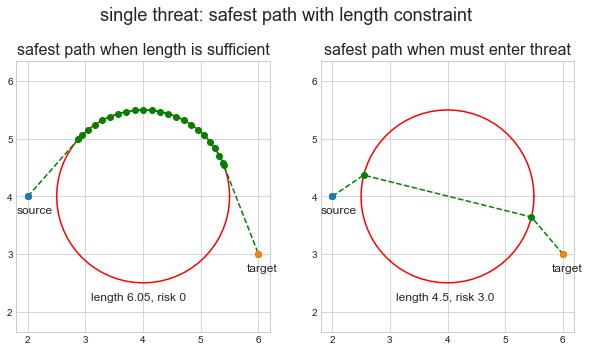

In [6]:
# safest path single threat

source = Point(2,4)
target = Point(6,3)
threat_center = Point(4,4)
threat_radius = 1.5
threat = threat_center.buffer(threat_radius)

plt.figure(figsize=(10,5))
plt.grid(True)
plt.suptitle('single threat: safest path with length constraint', fontsize=suptitle_font, y=1.03)

plt.subplot(1,2,1)
plt.axis('equal')
plt.title('safest path when length is sufficient', fontsize=title_font)
plt.scatter(source.x, source.y, zorder=9)
plt.scatter(target.x, target.y, zorder=9)
plt.plot(*threat.exterior.xy, color='red', zorder=1)
plt.text(source.x - 0.2, source.y - 0.3, 'source', fontsize=font, zorder=10)
plt.text(target.x - 0.2, target.y - 0.3, 'target', fontsize=font, zorder=10)
path, length, risk = safest_path_single_threat(source, target, threat_center, threat_radius)
plt.text(3.1, 2.2, f'length {round(length,2)}, risk {round(risk,2)}', fontsize=font, zorder=10)
plt.plot([p.x for p in path], [p.y for p in path], color='green', linestyle='dashed', zorder=5)
plt.scatter([p.x for p in path], [p.y for p in path], color='green', zorder=5)

plt.subplot(1,2,2)
plt.axis('equal')
plt.title('safest path when must enter threat', fontsize=title_font)
plt.scatter(source.x, source.y, zorder=9)
plt.scatter(target.x, target.y, zorder=9)
plt.plot(*threat.exterior.xy, color='red', zorder=1)
plt.text(source.x - 0.2, source.y - 0.3, 'source', fontsize=font, zorder=10)
plt.text(target.x - 0.2, target.y - 0.3, 'target', fontsize=font, zorder=10)
path, length, risk = single_threat_safest_path_with_length_constraint(source, target, threat_center, threat_radius, 4.5)
plt.text(3.1, 2.2, f'length {round(length,2)}, risk {round(risk,2)}', fontsize=font, zorder=10)

plt.plot([p.x for p in path], [p.y for p in path], color='green', linestyle='dashed', zorder=5)
plt.scatter([p.x for p in path], [p.y for p in path], color='green', zorder=5)

plt.savefig('safest_one_threat.png')

# multiple threats

## shortest path under risk constraint is NPH exactly like WCSP:
## we can model any constraint by unit threats

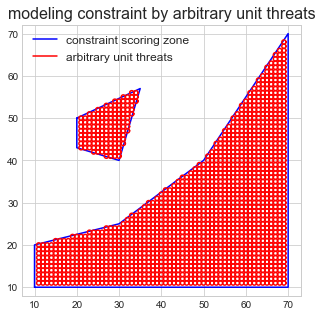

In [8]:
# modeling any constraint by unit threats

source = Point(2,4)
target = Point(6,5)
polygon1 = Polygon([[10,10],[10,20],[30,25],[50,40],[70,70],[70,10]])
polygon2 = Polygon([[20,50],[35,57],[30,40],[20,43]])

plt.figure(figsize=(5,5))
plt.grid(True)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axis('equal')
plt.title('modeling constraint by arbitrary unit threats', fontsize=title_font)
plt.plot(*polygon1.exterior.xy, color='blue')
plt.plot(*polygon2.exterior.xy, color='blue')
for r in range(100):
    for c in range(100):
        point = Point(r,c)
        if polygon1.contains(point) or polygon2.contains(point):
            threat = point.buffer(0.5)
            plt.plot(*threat.exterior.xy, color='red')

plt.legend(['constraint scoring zone', 'arbitrary unit threats'], fontsize=font)
leg = plt.gca().get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('red')
plt.savefig('modeling_constraint_by_threats.png')

## what about safest path under length constraint?